#Pistachio classification
###Pistachio is a shelled fruit from the anacardiaceae family. The homeland of pistachio is the Middle East. The Kirmizi pistachios and Siirt pistachios are the major types grown and exported in Turkey. Since the prices, tastes, and nutritional values of these types differs, the type of pistachio becomes important when it comes to trade.
###Your goal is to identify these two types of pistachios, which are frequently grown in Turkey, by classifying them via convolutional neural networks.
###Data collection: Kirmizi and Siirt pistachio types were obtained through the computer vision system. The pre-trained dataset includes a total of 2148 images, 1232 of Kirmizi type and 916 of Siirt type.

1. Importing the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# preprocessing
#  1. resizing
#  2. flattening

import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

# to flatten an array - a.flatten() where a is a numpy arrayy
target = []
images = []
flat_data = []

DATADIR = '/content/drive/MyDrive/Computer_vision_projects/Pistachio'
CATEGORIES = ['kirmizi', 'siirt']
for i in range(2):
  class_num = CATEGORIES.index(CATEGORIES[i])   #label encoding the categories
  path = os.path.join(DATADIR, CATEGORIES[i])   # create path to use all the images
  for img in os.listdir(path):
    img_array = imread(os.path.join(path, img))
    # print(img_array.shape)
  #   plt.imshow(img_array)
  #   break
  # break
    img_resized = resize(img_array, (224,224,3))  # normalizing the value from 0 to 1
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(i)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

In [4]:
flat_data.shape

(2002, 150528)

In [5]:
import pandas as pd
flat_data = pd.DataFrame(flat_data)

In [6]:
flat_data.columns

RangeIndex(start=0, stop=150528, step=1)

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(confusion_matrix):
    labels = ['Kirmizi', 'Shiirt']
    fig, ax = plt.subplots()
    im = ax.imshow(confusion_matrix, cmap='Blues')

    # Set labels
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)

    # Rotate the tick labels and set their alignment
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations
    for i in range(len(labels)):
        for j in range(len(labels)):
            text = ax.text(j, i, confusion_matrix[i, j], ha="center", va="center", color="black")

    # Set colorbar
    cbar = ax.figure.colorbar(im, ax=ax)

    # Set title and labels
    ax.set_title("Confusion Matrix")
    ax.set_xlabel("Predicted label")
    ax.set_ylabel("True label")

    # Show the plot
    plt.show()

In [8]:
from sklearn.metrics import classification_report, confusion_matrix

def evaluation(y_train_pred, y_test_pred, y_train, y_test):
  print('--------------------------------------------------------------')
  print('--------------------------------------------------------------')
  print("train_evaluation:\n")
  print(classification_report(y_train_pred, y_train))
  print(confusion_matrix(y_train_pred, y_train))
  plot_confusion_matrix(confusion_matrix(y_train_pred, y_train))
  print('--------------------------------------------------------------')
  print("\ntest_evaluation:\n")
  print(classification_report(y_test_pred, y_test))
  print(confusion_matrix(y_test_pred, y_test))
  plot_confusion_matrix(confusion_matrix(y_test_pred, y_test))
  print('--------------------------------------------------------------')
  print('--------------------------------------------------------------')

In [9]:
# Check for columns with all zeros
zero_columns = flat_data.columns[(flat_data == 0).all()]

# Drop columns with all zeros
flat_data = flat_data.drop(zero_columns, axis=1)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(flat_data, target, test_size = 0.3, random_state = 109)

In [11]:
flat_data.shape

(2002, 150528)

#Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--------------------------------------------------------------
--------------------------------------------------------------
train_evaluation:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       934
           1       1.00      1.00      1.00       467

    accuracy                           1.00      1401
   macro avg       1.00      1.00      1.00      1401
weighted avg       1.00      1.00      1.00      1401

[[934   0]
 [  0 467]]


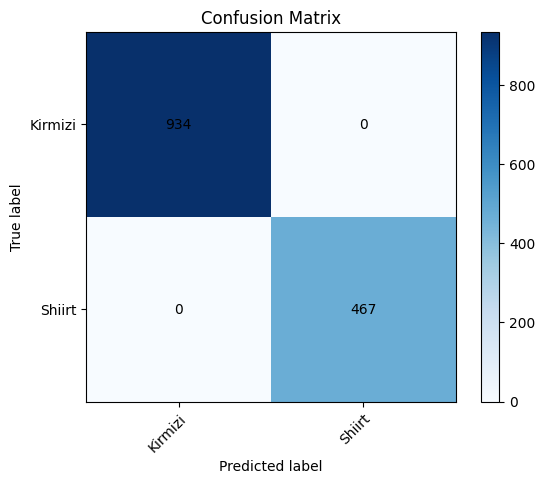

--------------------------------------------------------------

test_evaluation:

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       386
           1       0.88      0.83      0.85       215

    accuracy                           0.90       601
   macro avg       0.89      0.88      0.89       601
weighted avg       0.90      0.90      0.90       601

[[361  25]
 [ 37 178]]


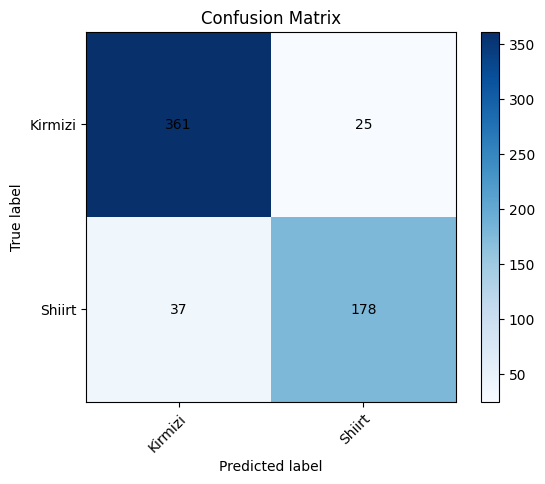

--------------------------------------------------------------
--------------------------------------------------------------
None


In [12]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_test_pred = logreg.predict(X_test)
y_train_pred = logreg.predict(X_train)
print(evaluation(y_train_pred, y_test_pred, y_train, y_test))

In [13]:
# Evaluate the model's performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8968386023294509
Precision: 0.827906976744186
Recall: 0.8768472906403941
F1 Score: 0.8516746411483254


# Decision Tree Classifier

--------------------------------------------------------------
--------------------------------------------------------------
train_evaluation:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       934
           1       1.00      1.00      1.00       467

    accuracy                           1.00      1401
   macro avg       1.00      1.00      1.00      1401
weighted avg       1.00      1.00      1.00      1401

[[934   0]
 [  0 467]]


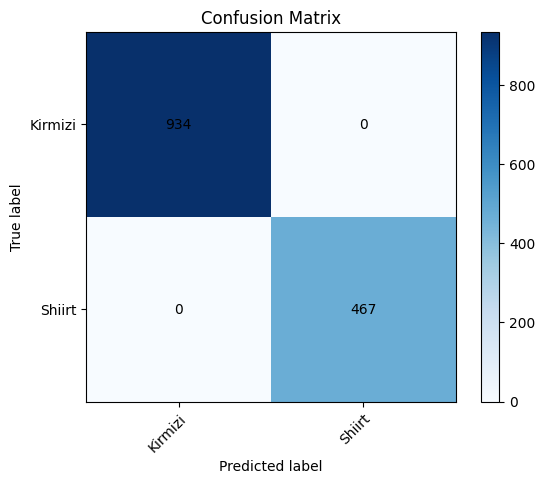

--------------------------------------------------------------

test_evaluation:

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       388
           1       0.81      0.77      0.79       213

    accuracy                           0.86       601
   macro avg       0.85      0.84      0.84       601
weighted avg       0.86      0.86      0.86       601

[[350  38]
 [ 48 165]]


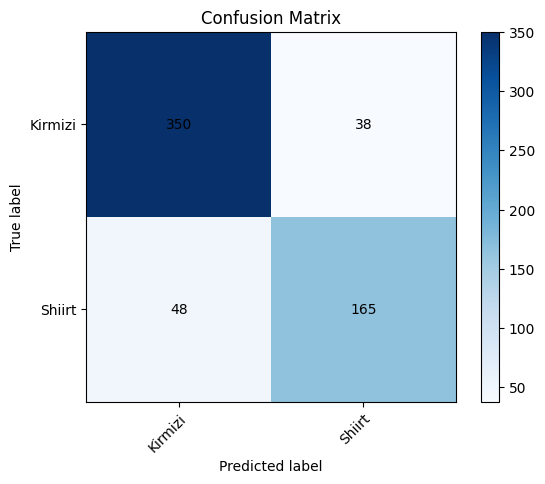

--------------------------------------------------------------
--------------------------------------------------------------
None


In [14]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_test_pred = dtc.predict(X_test)
y_train_pred = dtc.predict(X_train)
print(evaluation(y_train_pred, y_test_pred, y_train, y_test))

#Random Forest Classifier

--------------------------------------------------------------
--------------------------------------------------------------
train_evaluation:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       935
           1       1.00      1.00      1.00       466

    accuracy                           1.00      1401
   macro avg       1.00      1.00      1.00      1401
weighted avg       1.00      1.00      1.00      1401

[[934   1]
 [  0 466]]


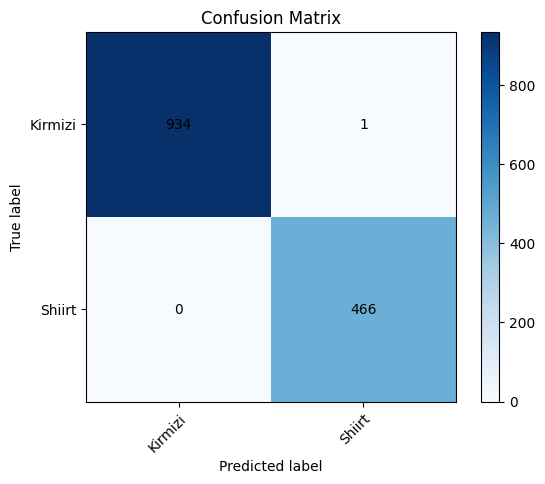

--------------------------------------------------------------

test_evaluation:

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       392
           1       0.87      0.85      0.86       209

    accuracy                           0.90       601
   macro avg       0.90      0.89      0.89       601
weighted avg       0.90      0.90      0.90       601

[[366  26]
 [ 32 177]]


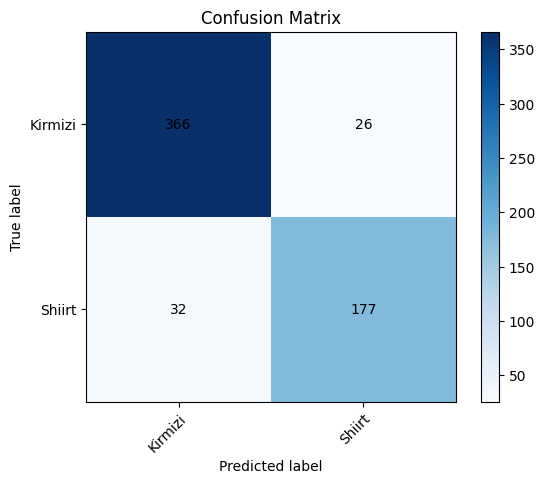

--------------------------------------------------------------
--------------------------------------------------------------
None


In [15]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=20)
rfc.fit(X_train, y_train)
y_test_pred = rfc.predict(X_test)
y_train_pred = rfc.predict(X_train)
print(evaluation(y_train_pred, y_test_pred, y_train, y_test))

# Naive Bayes

Accuracy: 0.8236272878535774
--------------------------------------------------------------
--------------------------------------------------------------
train_evaluation:

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       841
           1       0.88      0.73      0.80       560

    accuracy                           0.85      1401
   macro avg       0.86      0.83      0.84      1401
weighted avg       0.85      0.85      0.85      1401

[[784  57]
 [150 410]]


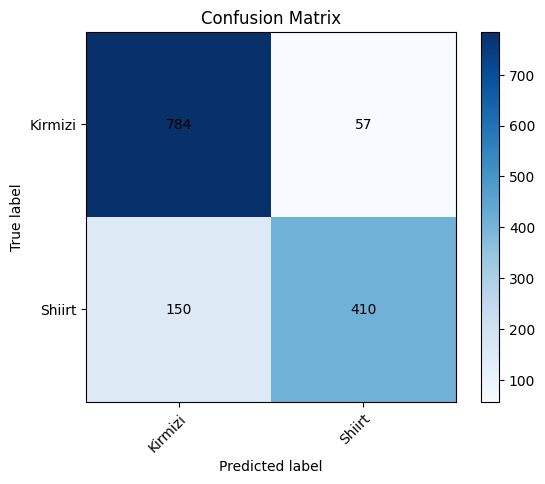

--------------------------------------------------------------

test_evaluation:

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       360
           1       0.83      0.70      0.76       241

    accuracy                           0.82       601
   macro avg       0.83      0.80      0.81       601
weighted avg       0.82      0.82      0.82       601

[[326  34]
 [ 72 169]]


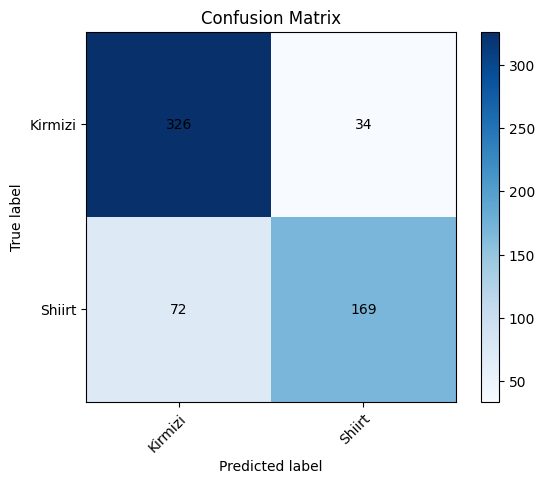

--------------------------------------------------------------
--------------------------------------------------------------
None


In [16]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
classifier = GaussianNB()

# Train the classifier
classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

y_test_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print(evaluation(y_train_pred, y_test_pred, y_train, y_test))

#KNN

--------------------------------------------------------------
--------------------------------------------------------------
train_evaluation:

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       875
           1       0.92      0.82      0.87       526

    accuracy                           0.91      1401
   macro avg       0.91      0.89      0.90      1401
weighted avg       0.91      0.91      0.91      1401

[[839  36]
 [ 95 431]]


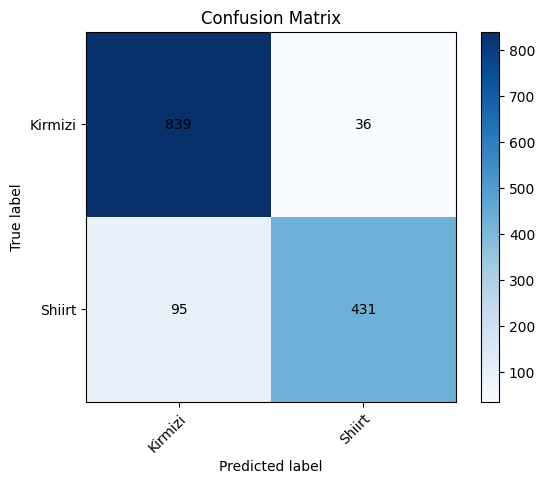

--------------------------------------------------------------

test_evaluation:

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       372
           1       0.89      0.79      0.84       229

    accuracy                           0.88       601
   macro avg       0.89      0.87      0.87       601
weighted avg       0.88      0.88      0.88       601

[[350  22]
 [ 48 181]]


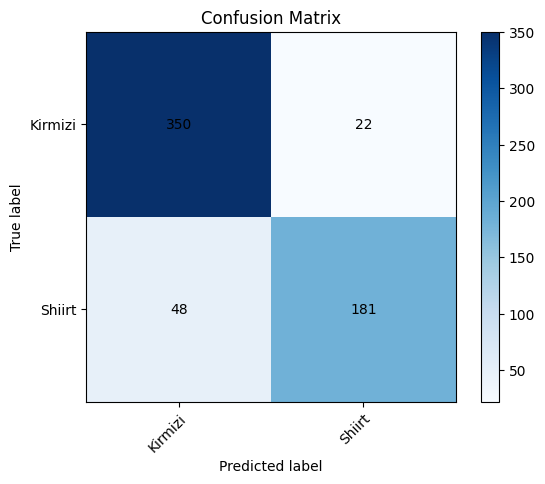

--------------------------------------------------------------
--------------------------------------------------------------
None


In [17]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_test_pred = knn.predict(X_test)
y_train_pred = knn.predict(X_train)
print(evaluation(y_train_pred, y_test_pred, y_train, y_test))

#Adaboost

--------------------------------------------------------------
--------------------------------------------------------------
train_evaluation:

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       938
           1       0.99      1.00      0.99       463

    accuracy                           1.00      1401
   macro avg       0.99      1.00      1.00      1401
weighted avg       1.00      1.00      1.00      1401

[[933   5]
 [  1 462]]


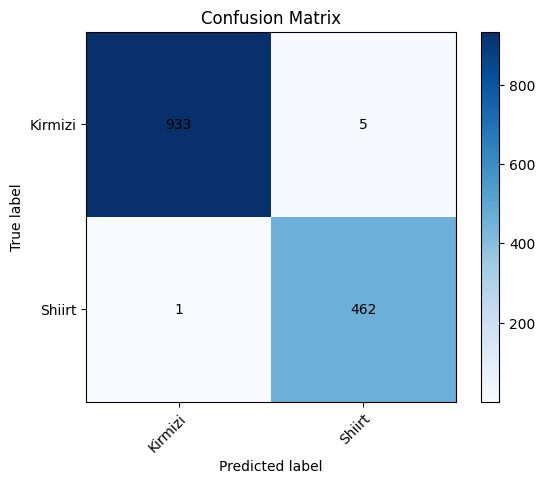

--------------------------------------------------------------

test_evaluation:

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       385
           1       0.87      0.81      0.84       216

    accuracy                           0.89       601
   macro avg       0.88      0.87      0.88       601
weighted avg       0.89      0.89      0.89       601

[[358  27]
 [ 40 176]]


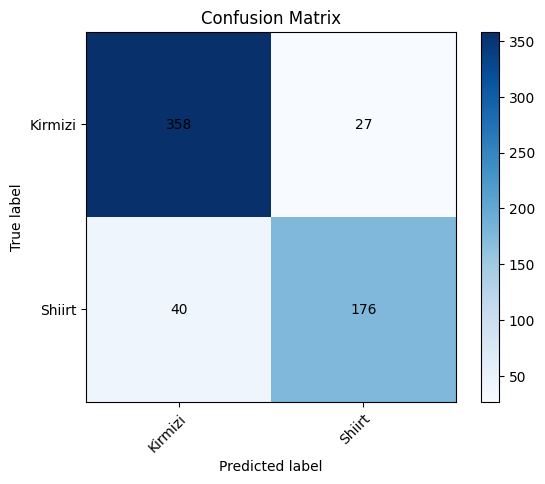

--------------------------------------------------------------
--------------------------------------------------------------
None


In [18]:
from sklearn.ensemble import AdaBoostClassifier
# Create an AdaBoost classifier
classifier = AdaBoostClassifier()

# Train the classifier
classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = classifier.predict(X_test)
y_test_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print(evaluation(y_train_pred, y_test_pred, y_train, y_test))

--------------------------------------------------------------
--------------------------------------------------------------
train_evaluation:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       934
           1       1.00      1.00      1.00       467

    accuracy                           1.00      1401
   macro avg       1.00      1.00      1.00      1401
weighted avg       1.00      1.00      1.00      1401

[[934   0]
 [  0 467]]


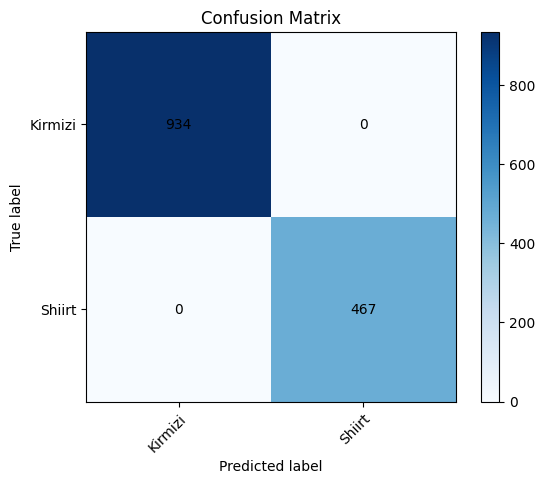

--------------------------------------------------------------

test_evaluation:

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       383
           1       0.89      0.83      0.86       218

    accuracy                           0.90       601
   macro avg       0.90      0.89      0.89       601
weighted avg       0.90      0.90      0.90       601

[[361  22]
 [ 37 181]]


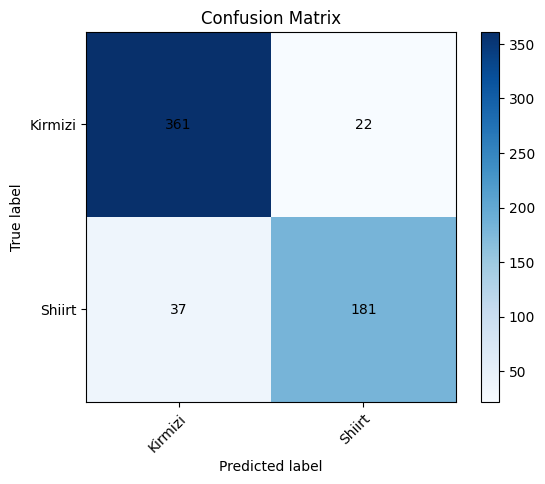

--------------------------------------------------------------
--------------------------------------------------------------
None


In [19]:
from sklearn import svm

svc = svm.SVC(probability = True, kernel = 'linear', gamma = 0.001)
svc.fit(X_train, y_train)
y_test_pred = svc.predict(X_test)
y_train_pred = svc.predict(X_train)
print(evaluation(y_train_pred, y_test_pred, y_train, y_test))

# Voting Classifier

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--------------------------------------------------------------
--------------------------------------------------------------
train_evaluation:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       936
           1       0.99      1.00      1.00       465

    accuracy                           1.00      1401
   macro avg       1.00      1.00      1.00      1401
weighted avg       1.00      1.00      1.00      1401

[[933   3]
 [  1 464]]


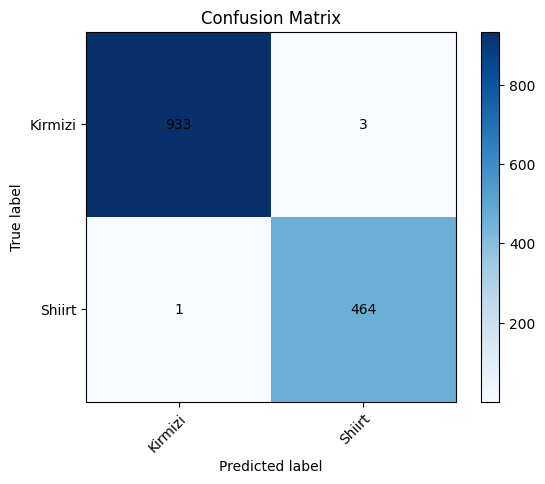

--------------------------------------------------------------

test_evaluation:

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       399
           1       0.87      0.88      0.87       202

    accuracy                           0.92       601
   macro avg       0.90      0.91      0.91       601
weighted avg       0.92      0.92      0.92       601

[[373  26]
 [ 25 177]]


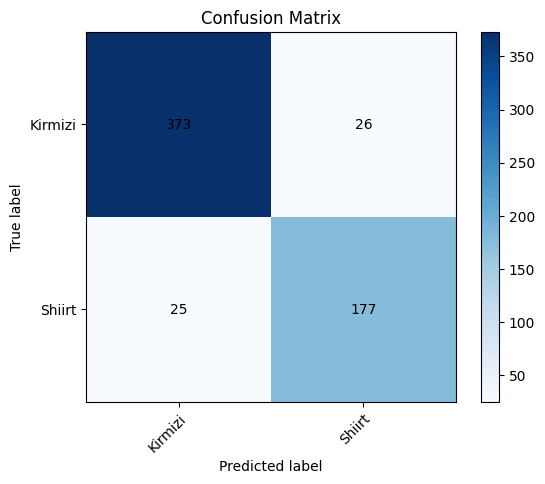

--------------------------------------------------------------
--------------------------------------------------------------
None


In [20]:
from sklearn.ensemble import VotingClassifier

# Create individual classifiers
classifier1 = LogisticRegression()
classifier2 = svm.SVC()
classifier3 = RandomForestClassifier()
classifier4 = AdaBoostClassifier()
classifier5 = KNeighborsClassifier(n_neighbors=5)

# Create a voting classifier with the individual classifiers
voting_classifier = VotingClassifier(estimators=[('lr', classifier1),
                                                 ('svc', classifier2),
                                                  ('rfc', classifier3),
                                                   ('Ab', classifier4),
                                                    ('Knn', classifier5)], voting='hard')

# Train the voting classifier
voting_classifier.fit(X_train, y_train)
y_test_pred = voting_classifier.predict(X_test)
y_train_pred = voting_classifier.predict(X_train)
print(evaluation(y_train_pred, y_test_pred, y_train, y_test))